In [149]:
import math
import time
import numpy as np
import pandas as p
import seaborn as sns
import datetime
from scipy import stats
sns.set_style("whitegrid")

In [150]:
socioeconomic_df = pd.read_csv('Census.csv',engine = 'c')
crimes_df=pd.read_csv('Crimes.csv',engine = 'c')
police_station_df=pd.read_csv('Police_Stations.csv',engine = 'c')

In [151]:
socioeconomic_df.shape

(78, 9)

In [152]:
crimes_df.shape

(7299208, 22)

In [153]:
police_station_df.shape

(23, 15)

In [154]:
socioeconomic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Community Area Number                         77 non-null     float64
 1   COMMUNITY AREA NAME                           78 non-null     object 
 2   PERCENT OF HOUSING CROWDED                    78 non-null     float64
 3   PERCENT HOUSEHOLDS BELOW POVERTY              78 non-null     float64
 4   PERCENT AGED 16+ UNEMPLOYED                   78 non-null     float64
 5   PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA  78 non-null     float64
 6   PERCENT AGED UNDER 18 OR OVER 64              78 non-null     float64
 7   PER CAPITA INCOME                             78 non-null     int64  
 8   HARDSHIP INDEX                                77 non-null     float64
dtypes: float64(7), int64(1), object(1)
memory usage: 5.6+ KB


In [155]:
crimes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7299208 entries, 0 to 7299207
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

In [156]:
police_station_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DISTRICT       23 non-null     object 
 1   DISTRICT NAME  23 non-null     object 
 2   ADDRESS        23 non-null     object 
 3   CITY           23 non-null     object 
 4   STATE          23 non-null     object 
 5   ZIP            23 non-null     int64  
 6   WEBSITE        23 non-null     object 
 7   PHONE          22 non-null     object 
 8   FAX            22 non-null     object 
 9   TTY            22 non-null     object 
 10  X COORDINATE   23 non-null     float64
 11  Y COORDINATE   23 non-null     float64
 12  LATITUDE       23 non-null     float64
 13  LONGITUDE      23 non-null     float64
 14  LOCATION       23 non-null     object 
dtypes: float64(4), int64(1), object(10)
memory usage: 2.8+ KB


In [157]:
socioeconomic_df.head(5)

,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [158]:
crimes_df.head(5)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"


In [159]:
police_station_df.head(100)

,DISTRICT,DISTRICT NAME,ADDRESS,CITY,STATE,ZIP,WEBSITE,PHONE,FAX,TTY,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION
0,Headquarters,Headquarters,3510 S Michigan Ave,Chicago,IL,60653,http://home.chicagopolice.org,NaN,NaN,NaN,1177731.401,1881697.404,41.830702,-87.623395,"(41.8307016873, -87.6233953459)"
1,18,Near North,1160 N Larrabee St,Chicago,IL,60610,http://home.chicagopolice.org/community/distri...,312-742-5870,312-742-5771,312-742-5773,1172080.029,1908086.527,41.903242,-87.643352,"(41.9032416531, -87.6433521393)"
2,19,Town Hall,850 W Addison St,Chicago,IL,60613,http://home.chicagopolice.org/community/distri...,312-744-8320,312-744-4481,312-744-8011,1169730.744,1924160.317,41.947400,-87.651512,"(41.9474004564, -87.651512018)"
3,20,Lincoln,5400 N Lincoln Ave,Chicago,IL,60625,http://home.chicagopolice.org/community/distri...,312-742-8714,312-742-8803,312-742-8841,1158399.146,1935788.826,41.979550,-87.692845,"(41.9795495131, -87.6928445094)"
4,22,Morgan Park,1900 W Monterey Ave,Chicago,IL,60643,http://home.chicagopolice.org/community/distri...,312-745-0710,312-745-0814,312-745-0569,1165825.476,1830851.333,41.691435,-87.668520,"(41.6914347795, -87.6685203937)"
5,24,Rogers Park,6464 N Clark St,Chicago,IL,60626,http://home.chicagopolice.org/community/distri...,312-744-5907,312-744-6928,312-744-7603,1164193.588,1943199.401,41.999763,-87.671324,"(41.9997634842, -87.6713242922)"
6,25,Grand Central,5555 W Grand Ave,Chicago,IL,60639,http://home.chicagopolice.org/community/distri...,312-746-8605,312-746-4353,312-746-8383,1138770.871,1913442.439,41.918609,-87.765574,"(41.9186088912, -87.765574479)"
7,1,Central,1718 S State St,Chicago,IL,60616,http://home.chicagopolice.org/community/distri...,312-745-4290,312-745-3694,312-745-3693,1176569.052,1891771.704,41.858373,-87.627356,"(41.8583725929, -87.627356171)"
8,2,Wentworth,5101 S Wentworth Ave,Chicago,IL,60609,http://home.chicagopolice.org/community/distri...,312-747-8366,312-747-5396,312-747-6656,1175864.837,1871153.753,41.801811,-87.630560,"(41.8018110912, -87.6305601801)"
9,3,Grand Crossing,7040 S Cottage Grove Ave,Chicago,IL,60637,http://home.chicagopolice.org/community/distri...,312-747-8201,312-747-5479,312-747-9168,1182739.183,1858317.732,41.766431,-87.605748,"(41.7664308925, -87.6057478606)"


In [160]:
crimes_df.columns = crimes_df.columns.str.replace(' ', '')
crimes_df.columns = crimes_df.columns.str.lower()
crimes_columns=list(crimes_df.columns)
crimes_columns

['id',
 'casenumber',
 'date',
 'block',
 'iucr',
 'primarytype',
 'description',
 'locationdescription',
 'arrest',
 'domestic',
 'beat',
 'district',
 'ward',
 'communityarea',
 'fbicode',
 'xcoordinate',
 'ycoordinate',
 'year',
 'updatedon',
 'latitude',
 'longitude',
 'location']

In [161]:
socioeconomic_df.columns = socioeconomic_df.columns.str.replace(' ', '')
socioeconomic_df.columns = socioeconomic_df.columns.str.lower()
socioeconomic_columns=list(socioeconomic_df.columns)
socioeconomic_columns

['communityareanumber',
 'communityareaname',
 'percentofhousingcrowded',
 'percenthouseholdsbelowpoverty',
 'percentaged16+unemployed',
 'percentaged25+withouthighschooldiploma',
 'percentagedunder18orover64',
 'percapitaincome',
 'hardshipindex']

In [162]:
police_station_df.columns = police_station_df.columns.str.replace(' ', '')
police_station_df.columns = police_station_df.columns.str.lower()
police_station_columns=list(police_station_df.columns)
police_station_columns

['district',
 'districtname',
 'address',
 'city',
 'state',
 'zip',
 'website',
 'phone',
 'fax',
 'tty',
 'xcoordinate',
 'ycoordinate',
 'latitude',
 'longitude',
 'location']

# Data Preprocessing

In [163]:
crimes_df.drop(['location'],axis=1,inplace=True)
crimes_df.head()

,id,casenumber,date,block,iucr,primarytype,description,locationdescription,arrest,domestic,...,district,ward,communityarea,fbicode,xcoordinate,ycoordinate,year,updatedon,latitude,longitude
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,15.0,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,6.0,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,14.0,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121


# Removing null values

<AxesSubplot:>

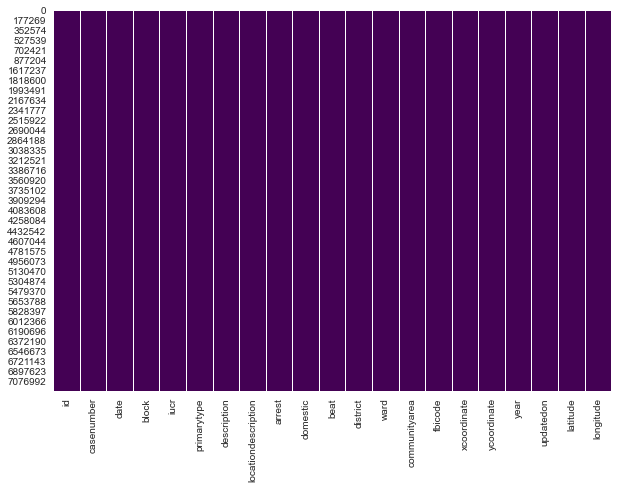

In [164]:
crimes_df=crimes_df.dropna()
plt.figure(figsize=(10,7))
sns.color_palette("magma", as_cmap=True)
sns.heatmap(crimes_df.isnull(), cbar = False,cmap="viridis")

<AxesSubplot:>

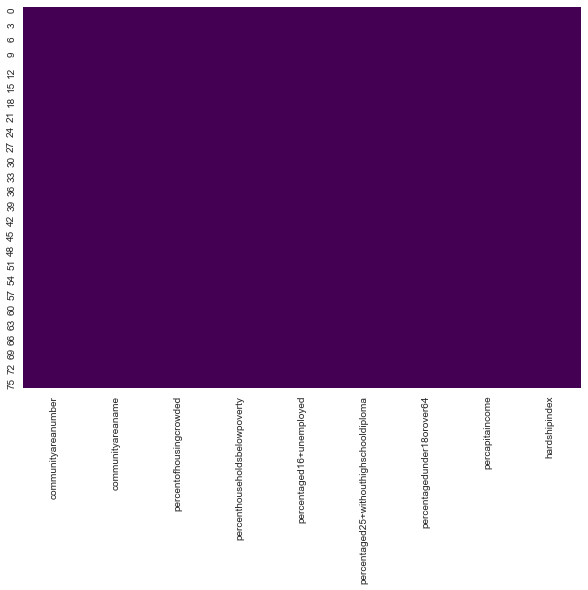

In [165]:
socioeconomic_df=socioeconomic_df.dropna()
plt.figure(figsize=(10,7))
sns.color_palette("magma", as_cmap=True)
sns.heatmap(socioeconomic_df.isnull(), cbar = False,cmap="viridis")

# Making the date time in python format

In [166]:
crimes_df.date=pd.to_datetime(crimes_df.date,format='%m/%d/%Y %I:%M:%S %p')
crimes_df.index = pd.DatetimeIndex(crimes_df.date)

# Dropping non important columns

In [167]:
crimes_df=crimes_df.drop(["casenumber", "domestic", "beat"], 1)
crimes_df.head()

,id,date,block,iucr,primarytype,description,locationdescription,arrest,district,ward,communityarea,fbicode,xcoordinate,ycoordinate,year,updatedon,latitude,longitude
date,,,,,,,,,,,,,,,,,,
2015-09-05 13:30:00,10224738,2015-09-05 13:30:00,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000
2015-09-04 11:30:00,10224739,2015-09-04 11:30:00,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,15.0,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400
2015-09-05 12:45:00,10224740,2015-09-05 12:45:00,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,14.0,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650
2015-09-05 13:00:00,10224741,2015-09-05 13:00:00,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121
2015-09-05 10:55:00,10224742,2015-09-05 10:55:00,082XX S LOOMIS BLVD,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,6.0,21.0,71.0,05,1168430.0,1850165.0,2015,02/10/2018 03:50:01 PM,41.744379,-87.658431


In [168]:
police_station_df=police_station_df.drop(['address','city','zip','location','website','phone', 'fax','tty', 'xcoordinate', 'ycoordinate'],axis=1)
police_station_df.head(5)

,district,districtname,state,latitude,longitude
0,Headquarters,Headquarters,IL,41.830702,-87.623395
1,18,Near North,IL,41.903242,-87.643352
2,19,Town Hall,IL,41.947400,-87.651512
3,20,Lincoln,IL,41.979550,-87.692845
4,22,Morgan Park,IL,41.691435,-87.668520


# Distance between crime location and police station

In [169]:
police_station_df.head()

,district,districtname,state,latitude,longitude
0,Headquarters,Headquarters,IL,41.830702,-87.623395
1,18,Near North,IL,41.903242,-87.643352
2,19,Town Hall,IL,41.947400,-87.651512
3,20,Lincoln,IL,41.979550,-87.692845
4,22,Morgan Park,IL,41.691435,-87.668520


In [170]:
crimes_df.head()

,id,date,block,iucr,primarytype,description,locationdescription,arrest,district,ward,communityarea,fbicode,xcoordinate,ycoordinate,year,updatedon,latitude,longitude
date,,,,,,,,,,,,,,,,,,
2015-09-05 13:30:00,10224738,2015-09-05 13:30:00,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000
2015-09-04 11:30:00,10224739,2015-09-04 11:30:00,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,15.0,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400
2015-09-05 12:45:00,10224740,2015-09-05 12:45:00,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,14.0,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650
2015-09-05 13:00:00,10224741,2015-09-05 13:00:00,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121
2015-09-05 10:55:00,10224742,2015-09-05 10:55:00,082XX S LOOMIS BLVD,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,6.0,21.0,71.0,05,1168430.0,1850165.0,2015,02/10/2018 03:50:01 PM,41.744379,-87.658431


In [171]:
crime_locations=np.array(zip(np.array(crimes_df.latitude),np.array(crimes_df.longitude)))
police_stn=np.array(zip(np.array(police_station_df.latitude),np.array(police_station_df.longitude)))  

In [172]:
police_stn

array(<zip object at 0x7f930f656300>, dtype=object)

In [173]:
from math import radians, sin, cos, atan2,sqrt
'''
haversine formula
a = sin²(φB - φA/2) + cos φA * cos φB * sin²(λB - λA/2)
c = 2 * atan2( √a, √(1−a) )
d = R ⋅ c

'''
def calculate_Distance(crime_location, police_station):
 
    print(crime_location)
    radius=6371000 #in meters
    print(police_station)
    lat_delta = np.radians(police_station[:,0]) -radians(crime_location[0]) #delta phi
    long_delta = np.radians(police_station[:,1]) - radians(crime_location[1])#delta lambda
    
    #haversine distance
    
    a = sin(lat_delta/2) * sin(lat_delta/2) + cos(radians(police_station[:,0]))\
    * cos(radians(crime_location[0])) * sin(long_delta/2) * sin(long_delta/2)
   
    c = 2 * atan2(sqrt(a) , sqrt(1 - a))
    
    delta_distance = round((radius * c /1000),3) #final distance in km
    return min(delta_distance)
    
                       
                      
                       
    

In [174]:
closest_police_stn=[]
for crime_point in crime_locations:
    delta_dist=calculate_Distance(crime_point,police_stn)
    closest_police_stn.append(delta_dist)
closest_police_stn

TypeError: iteration over a 0-d array